<a href="https://www.kaggle.com/code/alexchen510/life-expectancy-trend-analysis?scriptVersionId=164596516" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pylab as plt
import plotly.express as px
plt.style.use('ggplot')


In [2]:
df = pd.read_csv('/kaggle/input/life-expectancy-trends-for-males-and-females/life_expectancy.csv')

Step 1: Understadning the data

* Dataframe shape
* head an tail
* dtypes
* describle


In [3]:
# Check First 10 Rows od the data frame 
df.head(10)

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,0,Abkhazia,OWID_ABK,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,1,Afghanistan,AFG,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,2,Afghanistan,AFG,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,3,Afghanistan,AFG,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,4,Afghanistan,AFG,1953,29.600000,28.300000,7.764549e+06,-1.30000
5,5,Afghanistan,AFG,1954,29.900000,28.600000,7.864289e+06,-1.30000
6,6,Afghanistan,AFG,1955,30.600000,29.300000,7.971933e+06,-1.30000
7,7,Afghanistan,AFG,1956,31.200000,29.700000,8.087730e+06,-1.50000
8,8,Afghanistan,AFG,1957,31.700000,30.300000,8.210207e+06,-1.40000
9,9,Afghanistan,AFG,1958,32.200000,30.800000,8.333827e+06,-1.40000


In [4]:
#Check the last 5 rows of the dataframe 
df.tail()

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
16998,18403,Zimbabwe,ZWE,2017,63.0,58.2,14751101.0,-4.8
16999,18404,Zimbabwe,ZWE,2018,63.6,59.0,15052191.0,-4.6
17000,18405,Zimbabwe,ZWE,2019,63.7,58.6,15354606.0,-5.1
17001,18406,Zimbabwe,ZWE,2020,63.9,58.1,15669663.0,-5.8
17002,18407,Zimbabwe,ZWE,2021,62.0,56.2,15993525.0,-5.8


In [5]:
# Random 10 sampls from the data frame
df.sample(10)

,Unnamed: 0,Country,Country Code,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
7642,7943,Jersey,JEY,1953,72.5,66.8,58663.0,-5.7
4651,4803,Eritrea,ERI,1987,49.9,44.8,2000360.0,-5.1
7981,8282,Kiribati,KIR,2004,66.6,63.2,96239.0,-3.4
6292,6517,Guernsey,GGY,1971,75.9,69.6,53121.0,-6.3
2719,2868,Cape Verde,CPV,2001,73.0,66.3,465970.0,-6.7
13153,14254,Saint Vincent and the Grenadines,VCT,1990,75.0,69.8,112507.0,-5.2
15310,16489,Tokelau,TKL,1986,68.2,67.7,1777.0,-0.5
9523,10401,Mauritania,MRT,1962,46.6,45.5,885944.0,-1.1
3193,3343,Comoros,COM,1969,45.5,42.9,236017.0,-2.6
11476,12575,Oman,OMN,1970,49.8,45.7,670697.0,-4.1


In [6]:
#  Columns of the df
df.columns

Index(['Unnamed: 0', 'Country', 'Country Code', 'Year',
       'Female Life Expectancy', 'Male Life Expectancy', 'Population',
       'Life Expectancy Gap'],
      dtype='object')

In [7]:
# index of the df
df.index

RangeIndex(start=0, stop=17003, step=1)

In [8]:
# information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17003 entries, 0 to 17002
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17003 non-null  int64  
 1   Country                 17003 non-null  object 
 2   Country Code            17003 non-null  object 
 3   Year                    17003 non-null  int64  
 4   Female Life Expectancy  17003 non-null  float64
 5   Male Life Expectancy    17003 non-null  float64
 6   Population              17003 non-null  float64
 7   Life Expectancy Gap     17003 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ MB


In [9]:
#quick summary of the df using describe
df.describe()

,Unnamed: 0,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,9133.030171,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,5340.684374,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,0.000000,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,4401.500000,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,9019.000000,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,13852.500000,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,18407.000000,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


In [10]:
# Shape of the data frame
df.shape

(17003, 8)

Step 2: Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [11]:
# Dropped off unamed column, and country code

df = df[['Country',  'Year',
       'Female Life Expectancy', 'Male Life Expectancy', 'Population',
       'Life Expectancy Gap']]

In [12]:
# Check value count of Country
df['Country'].value_counts()

Country
Lebanon                        72
Rwanda                         72
Nepal                          72
Netherlands                    72
New Caledonia                  72
                               ..
French Southern Territories     1
Christmas Island                1
Cocos Islands                   1
Pitcairn                        1
Abkhazia                        1
Name: count, Length: 247, dtype: int64

In [13]:
# Checking value count of Year
df['Year'].value_counts()

Year
2015    247
1950    236
2001    236
2000    236
1999    236
       ... 
1972    236
1971    236
1970    236
1969    236
2021    236
Name: count, Length: 72, dtype: int64

In [14]:
# Check for null values in the data frame
df.isna().sum()

Country                   0
Year                      0
Female Life Expectancy    0
Male Life Expectancy      0
Population                0
Life Expectancy Gap       0
dtype: int64

In [15]:
# Check for duplicated record 
df.duplicated().sum()

0

Step 3: Feature Understanding

(Univariate analysis)

Plotting Feature Distribution Histogram KDE Boxplot

Text(0.5, 0, 'Female Life Expectancy Score')

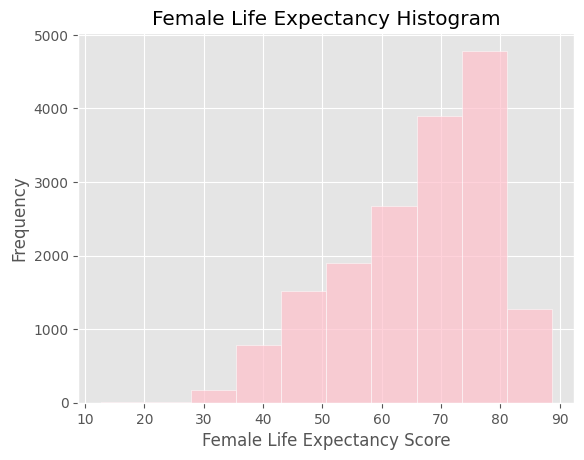

In [16]:
# Histogram of Female Life Expectancy using Pandas 

ax = df['Female Life Expectancy']\
        .plot(kind ='hist', 
         bins = 10,
         title = 'Female Life Expectancy Histogram',
         color = 'pink',
         edgecolor = 'white',
         alpha = 0.7)
ax.set_xlabel('Female Life Expectancy Score')

Text(0.5, 0, 'Male Life Expectancy Score')

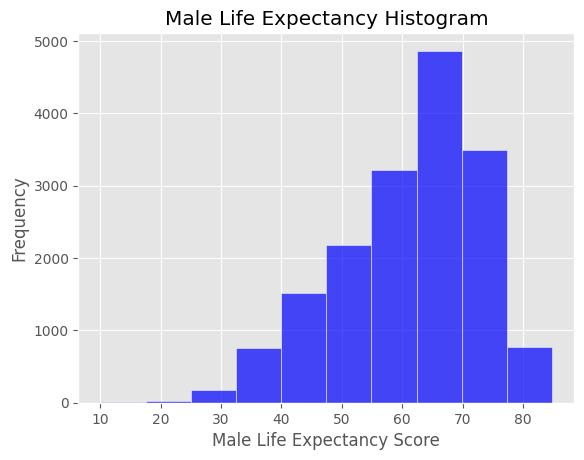

In [17]:
# Histogram of male Life Expectancy using Pandas 

ax = df['Male Life Expectancy']\
        .plot(kind ='hist', 
         bins = 10,
         title = 'Male Life Expectancy Histogram',
         color = 'blue',
         edgecolor = 'white',
         alpha = 0.7)
ax.set_xlabel('Male Life Expectancy Score')

Text(0.5, 0, 'Male Life vs Female Expectancy Score')

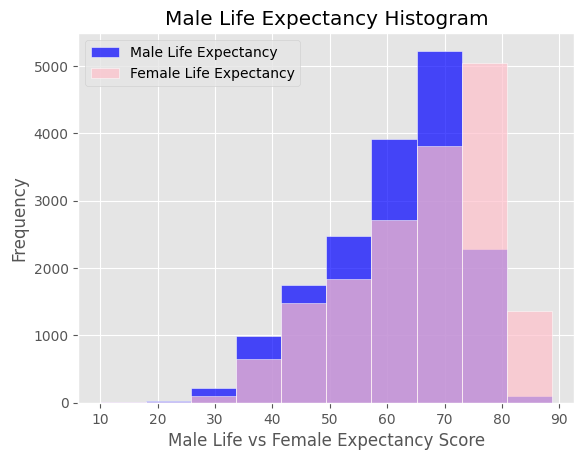

In [18]:
ax = df[['Male Life Expectancy','Female Life Expectancy']]\
        .plot(kind ='hist', 
         title = 'Male Life Expectancy Histogram',
         color = ['blue','pink'],
         edgecolor = 'white',
         alpha = 0.7)
ax.set_xlabel('Male Life vs Female Expectancy Score')


Step 4: Feature Relationships

Map out life expentancy in each country

In [19]:
df

,Country,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
0,Abkhazia,2015,66.168444,61.202554,2.131189e+07,-4.96589
1,Afghanistan,1950,28.400000,27.100000,7.480464e+06,-1.30000
2,Afghanistan,1951,28.600000,27.400000,7.571542e+06,-1.20000
3,Afghanistan,1952,29.100000,27.800000,7.667534e+06,-1.30000
4,Afghanistan,1953,29.600000,28.300000,7.764549e+06,-1.30000
...,...,...,...,...,...,...
16998,Zimbabwe,2017,63.000000,58.200000,1.475110e+07,-4.80000
16999,Zimbabwe,2018,63.600000,59.000000,1.505219e+07,-4.60000
17000,Zimbabwe,2019,63.700000,58.600000,1.535461e+07,-5.10000
17001,Zimbabwe,2020,63.900000,58.100000,1.566966e+07,-5.80000


In [20]:
df.columns 

Index(['Country', 'Year', 'Female Life Expectancy', 'Male Life Expectancy',
       'Population', 'Life Expectancy Gap'],
      dtype='object')

In [21]:
#Plotting a bubble map using plotly express

df_sorted = df.sort_values('Year')

fig = px.scatter_geo(df_sorted,
                    locations = 'Country',
                    locationmode = 'country names', 
                    color = 'Male Life Expectancy',
                    color_continuous_scale = 'viridis',
                    hover_name = 'Country',
                    size = "Male Life Expectancy",
                    projection = "natural earth",
                    animation_frame = 'Year')

#show plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [22]:
df = df.query("Country == 'United States'")

In [23]:
df

,Country,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
16138,United States,1950,71.0,65.4,148281550.0,-5.6
16139,United States,1951,71.2,65.4,150598450.0,-5.8
16140,United States,1952,71.5,65.5,152941730.0,-6.0
16141,United States,1953,71.9,65.8,155451200.0,-6.1
16142,United States,1954,72.7,66.6,158205870.0,-6.1
...,...,...,...,...,...,...
16205,United States,2017,81.4,76.3,329791230.0,-5.1
16206,United States,2018,81.5,76.5,332140030.0,-5.0
16207,United States,2019,81.7,76.6,334319680.0,-5.1
16208,United States,2020,80.3,74.6,335942000.0,-5.7


Life Expectancy Between Male vs Female in United States

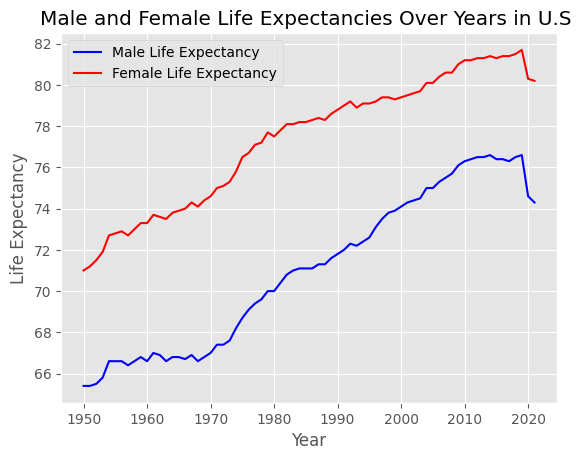

In [24]:
# Plot both male and female life expectancy on the same graph
plt.plot(df['Year'], df['Male Life Expectancy'], label='Male Life Expectancy',color = 'blue')
plt.plot(df['Year'], df['Female Life Expectancy'], label='Female Life Expectancy', color = 'red')
# plt.plot(df['Year'],df['Life Expectancy Gap'], label = 'Life Expectancy Gap',linestyle = '--', color = 'green' )

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Male and Female Life Expectancies Over Years in U.S ')

# Add legend
plt.legend()

# Show the plot
plt.show()